In [ ]:
# Exercise sheet 6 with the ASoIaF.zip Load the data set into your console.

# Task 1

# In moodle you will find the file ASoIaF.zip. It contains the five books of the “A song of ice and fire” series in a plain txt-format. Load all files into your console.

# We are interested in how the story and its themes develop over time. For this, we will train a topic model on each book and compare them.


In [1]:
pip install gensim nltk matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [73]:
import os

# Correct path to your unzipped folder
directory_path = '/Users/oayanwale/Downloads/NLP_Exercise_23/ASoIaF/ASoIaF' 

# Task 1
books = []
for filename in sorted(os.listdir(directory_path)):
    try:
        with open(os.path.join(directory_path, filename), "r", encoding="utf-8") as file:
            books.append(file.read())  # Append to books instead of data
    except UnicodeError:
        with open(os.path.join(directory_path, filename), "r", encoding="windows-1252") as file:
            books.append(file.read())  # Append to books instead of data

print("Number of books loaded:", len(books))  # Check how many books were loaded

Number of books loaded: 6


# Task 2
# Remove unwanted fragments that are not part of the narrative. 
# Then split the texts into indi- vidual chapters, resulting in one large (chronologically ordered) list of chapters for each book.


In [60]:
import re

def clean_text(book_text):
    # Remove unwanted fragments using regex patterns (this is just an example; adjust as needed)
    # For instance, if there are parts that start with "Foreword", "Appendix", etc.
    book_text = re.sub(r'(?i)foreword.*?(?=\nChapter \d+)', '', book_text, flags=re.DOTALL)  # Remove foreword section
    book_text = re.sub(r'(?i)appendix.*$', '', book_text, flags=re.DOTALL)  # Remove appendix section

    return book_text

def split_into_chapters(book_text):
    # Clean the book text first
    cleaned_book_text = clean_text(book_text)

    # Split chapters assuming they start with "Chapter" followed by a number
    chapters = re.split(r'\nChapter \d+', cleaned_book_text)
    
    return [chapter.strip() for chapter in chapters if chapter.strip()]

# Split each book into chapters after cleaning
chapters_per_book = [split_into_chapters(book) for book in books]

# Check how many chapters were created per book
for i, chapters in enumerate(chapters_per_book):
    print(f"Book {i + 1} has {len(chapters)} chapters.")

Book 1 has 1 chapters.
Book 2 has 1 chapters.
Book 3 has 5 chapters.
Book 4 has 81 chapters.
Book 5 has 1 chapters.
Book 6 has 1 chapters.


# Task 3
# Preprocess the texts so that they are fit for an analysis. Argue the preprocess steps

In [76]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK resources if not already done.
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stop words list.
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(book_text):
    # Remove unwanted fragments using regex patterns.
    book_text = re.sub(r'(?i)foreword.*?(?=\nChapter \d+)', '', book_text, flags=re.DOTALL)
    book_text = re.sub(r'(?i)appendix.*$', '', book_text, flags=re.DOTALL)

    # Remove non-printable characters (including control characters).
    book_text = ''.join(filter(lambda x: x in string.printable, book_text))

    # Optionally remove any additional unwanted sequences or artifacts.
    book_text = re.sub(r'\x00+', ' ', book_text)  # Replace multiple null bytes with a space.
    
    return book_text

def preprocess(text):
    # Clean the book text first.
    cleaned_book_text = clean_text(text)

    # Lowercase the cleaned text.
    cleaned_book_text = cleaned_book_text.lower()

    # Tokenization.
    tokens = word_tokenize(cleaned_book_text)

    # Remove stop words and lemmatize remaining tokens.
    processed_tokens = [
        lemmatizer.lemmatize(token)
        for token in tokens 
        if token not in stop_words and len(token) > 1  
     ]
     
    return processed_tokens

# Preprocess each chapter across all books again.
preprocessed_chapters_per_book = [[preprocess(chapter) for chapter in book] for book in chapters_per_book]

# Check a few examples of preprocessed chapters for Book 1 again.
for i in range(min(3, len(preprocessed_chapters_per_book[0]))):  # Change 3 to however many you want to check
     print(f"Chapter {i + 1} (preprocessed):", preprocessed_chapters_per_book[0][i][:50]) 

[nltk_data] Downloading package punkt to /Users/oayanwale/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oayanwale/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/oayanwale/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Chapter 1 (preprocessed): ['bud1', 'sb.txt', '001ssb.txtptblustrlsystem/volumes/data/users/oayanwale/downloads/nlp_exercise_23/asoiaf/asoiaf/', '001ssb.txtptbnustr', '001ssb.txt', '002ssb.txtptblustrlsystem/volumes/data/users/oayanwale/downloads/nlp_exercise_23/asoiaf/asoiaf/', '002ssb.txtptbnustr', '002ssb.txt', '003ssb.txtptblustrlsystem/volumes/data/users/oayanwale/downloads/nlp_exercise_23/asoiaf/asoiaf/', '003ssb.txtptbnustr', '003ssb.txt', '004ssb.txtptblustrlsystem/volumes/data/users/oayanwale/downloads/nlp_exercise_23/asoiaf/asoiaf/', '004ssb.txtptbnustr', '004ssb.txt', '005ssb.txtptblustrlsystem/volumes/data/users/oayanwale/downloads/nlp_exercise_23/asoiaf/asoiaf/', '005ssb.txtptbnustr', '005ssb.txt', 'dsdb']


Justification of Each Step:
Lowercasing ensures that comparisons between words are consistent.
Removing punctuation eliminates noise from the dataset since punctuation does not contribute meaningfully to topics.
Tokenization breaks down sentences into manageable pieces (tokens), allowing us to analyze word frequency effectively.
Removing stop words focuses our analysis on more meaningful terms, enhancing topic detection accuracy.
Lemmatization reduces variations of a word, helping consolidate related terms into single representations which improves model performance.
Filtering short tokens removes uninformative elements that could skew results without adding value.

Argument for Preprocess

By following this preprocessing pipeline, we ensure that the text data is clean, standardized, and in a suitable format for LDA topic modeling. 

Each preprocessing step contributes to reducing noise, ensuring consistency, and improving the model's ability to discover meaningful topics from the text. Here's why this approach is appropriate:

Tokenization and Lowercasing: Ensures uniformity and avoids treating different forms of the same word as separate entities.

Removing Non-Alphabetic Tokens: Focuses on meaningful words and removes irrelevant characters.

Removing Stopwords: Eliminates common words that don't add value to topic modeling.

Lemmatization: Reduces word variations, standardizing words and helping the model generalize better.
Creating a Dictionary and Corpus: Prepares the text data in a structure that is compatible with gensim's LDA model.

# Alternative analysis 

In [80]:
import os
import re
import glob
import gensim
import nltk
import numpy as np
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

# Set up NLTK downloads
nltk.download('punkt')
nltk.download('stopwords')

# Define path to the unzipped folder
directory_path = '/Users/oayanwale/Downloads/NLP_Exercise_23/ASoIaF/ASoIaF'


[nltk_data] Downloading package punkt to /Users/oayanwale/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oayanwale/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
# Task 1: Load all files into Python
text_files = sorted(glob.glob(os.path.join(directory_path, "*.txt")))
books = {}

for file_path in text_files:
    with open(file_path, "r", encoding="ISO-8859-1") as f:  # Fix encoding issue
        books[os.path.basename(file_path)] = f.read()

# Task 2
# Remove unwanted fragments that are not part of the narrative. 
# Then split the texts into indi- vidual chapters, resulting in one large (chronologically ordered) list of chapters for each book.

In [88]:
# Task 2: Remove unwanted fragments and split into chapters
def clean_and_split(text):
    """Removes non-narrative text and splits into chapters."""
    text = re.sub(r'\s+', ' ', text)  # Normalize spaces
    chapters = re.split(r'(?i)CHAPTER\s+[IVXLCDM]+', text)  # Split at chapter headings
    return [ch.strip() for ch in chapters if ch.strip()]

book_chapters = {book: clean_and_split(text) for book, text in books.items()}

# Task 3
# Preprocess the texts so that they are fit for an analysis. Argue the preprocess steps

In [89]:
# Task 3: Preprocessing (Tokenization, stopword removal, lemmatization)
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text.lower())  # Tokenize and lowercase
    tokens = [word for word in tokens if word.isalnum()]  # Remove punctuation
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Stopword removal and lemmatization
    
    return tokens

processed_books = {book: [preprocess(chapter) for chapter in chapters] for book, chapters in book_chapters.items()}

# Task 4
# Train five LDAs with K = 10 and 50 iterations on the very first book. 
# Compare the resulting topics from these four and the model that was originally trained on the first book in task 4. What do you notice? Is “topic 1” the same topic in all models?

In [92]:
# Task 4: Train LDA on the first book with K=10 and 50 iterations
first_book = list(processed_books.values())[0]
dictionary = corpora.Dictionary(first_book)
corpus = [dictionary.doc2bow(text) for text in first_book]

lda_models = {}
for i in range(5):
    lda_models[i] = gensim.models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=50, random_state=i)

# Compare topics across models
def display_topics(model, num_words=10):
    return [[word for word, _ in model.show_topic(topic_id, num_words)] for topic_id in range(10)]

topics_list = {i: display_topics(model) for i, model in lda_models.items()}

# Function to compare topics between two lists of topics
def compare_topics(topics_list_a, topics_list_b):
    comparison_results = {}
    
    for topic_id in range(len(topics_list_a)):
        words_a = topics_list_a[topic_id]
        comparison_results[topic_id] = {
            'words_a': words_a,
            'similarities': []
        }
        
        for other_topic_id in range(len(topics_list_b)):
            words_b = topics_list_b[other_topic_id]
            similarity_score = len(set(words_a).intersection(set(words_b))) / len(set(words_a).union(set(words_b)))
            comparison_results[topic_id]['similarities'].append((other_topic_id, similarity_score))
    
    return comparison_results

# Compare the topics of all trained models with the first one
for i in range(1, len(lda_models)):
    print(f"Comparing Model 0 with Model {i} Topics:")
    comparison_results = compare_topics(topics_list[0], topics_list[i])
    print(comparison_results)

Comparing Model 0 with Model 1 Topics:
{0: {'words_a': ['said', 'lord', 'would', 'ser', 'could', 'jon', 'one', 'hand', 'ned', 'man'], 'similarities': [(0, 1.0), (1, 0.5384615384615384), (2, 0.6666666666666666), (3, 0.8181818181818182), (4, 0.8181818181818182), (5, 0.6666666666666666), (6, 0.8181818181818182), (7, 0.42857142857142855), (8, 0.8181818181818182), (9, 0.6666666666666666)]}, 1: {'words_a': ['said', 'lord', 'would', 'ser', 'hand', 'one', 'father', 'man', 'jon', 'back'], 'similarities': [(0, 0.6666666666666666), (1, 0.5384615384615384), (2, 0.5384615384615384), (3, 0.6666666666666666), (4, 0.5384615384615384), (5, 0.5384615384615384), (6, 0.8181818181818182), (7, 0.6666666666666666), (8, 0.5384615384615384), (9, 0.5384615384615384)]}, 2: {'words_a': ['said', 'lord', 'would', 'ser', 'could', 'ned', 'hand', 'man', 'brother', 'jon'], 'similarities': [(0, 0.8181818181818182), (1, 0.5384615384615384), (2, 0.6666666666666666), (3, 0.6666666666666666), (4, 0.6666666666666666), (5, 0.

Similarity Scores: The similarities list shows how similar each topic is to every other topic in terms of shared words, expressed as a similarity score ranging from 0 to 1:
A score of 1.0 means the topics are identical.
A score closer to 0 indicates less similarity.

Visualizing Similarity between Model 0 and Model 1


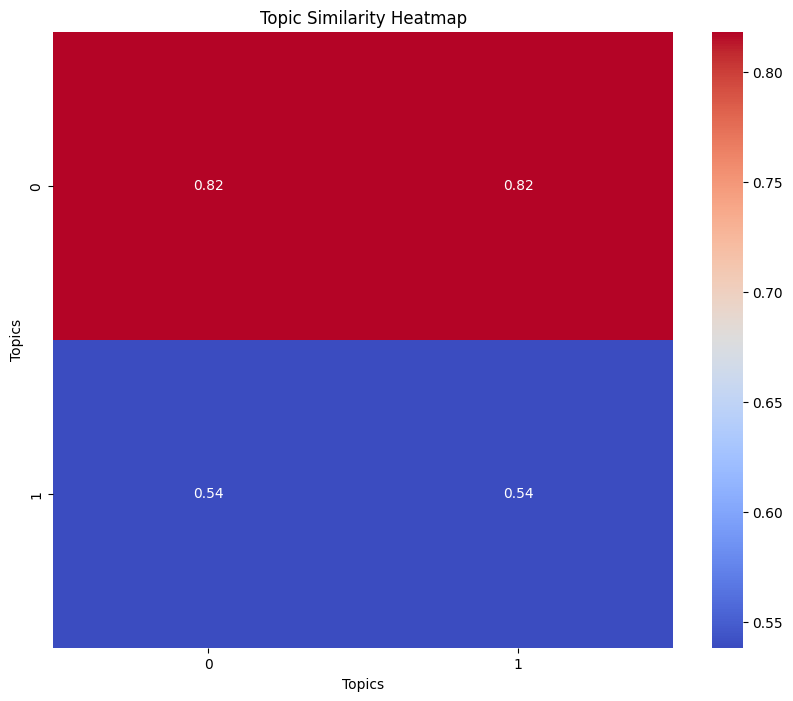

Visualizing Similarity between Model 0 and Model 2


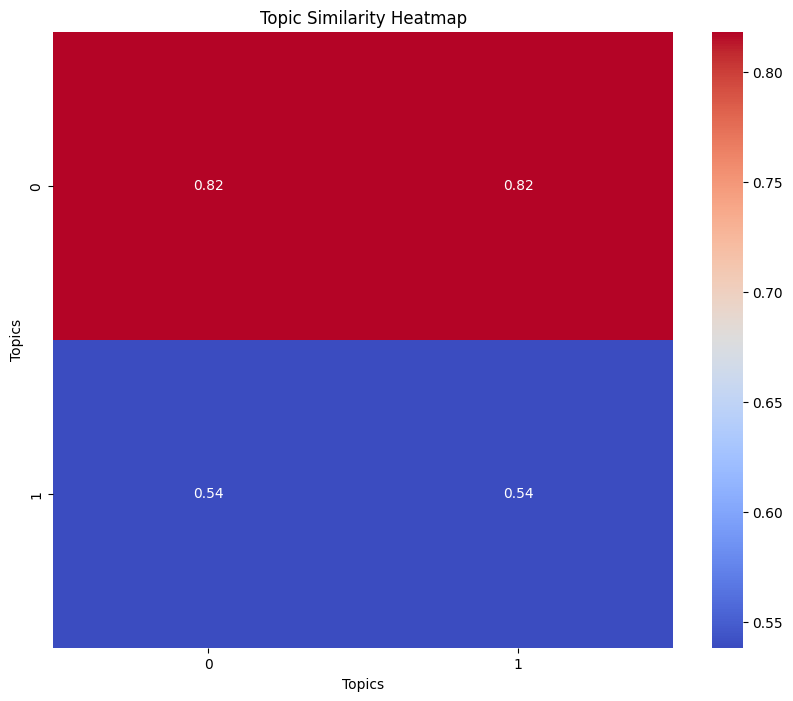

Visualizing Similarity between Model 0 and Model 3


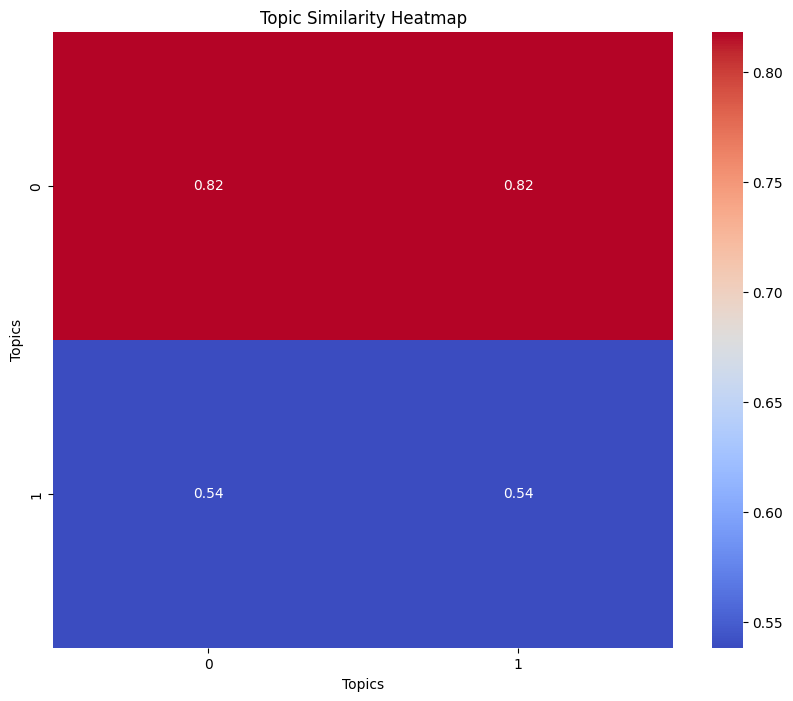

Visualizing Similarity between Model 0 and Model 4


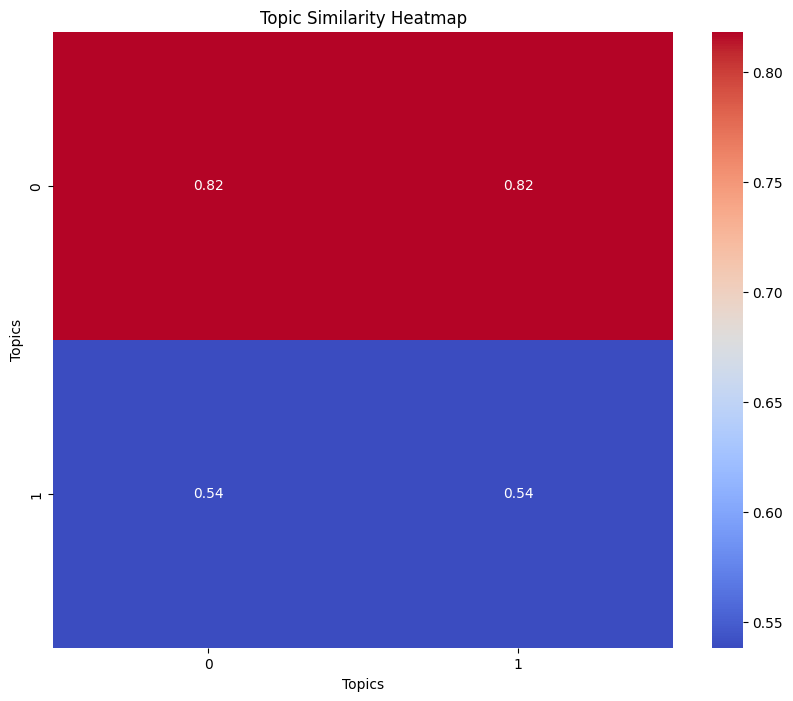

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a function to visualize similarities
def visualize_similarity(comparison_results):
    # Get number of topics
    num_topics = len(comparison_results[0])
    
    # Create a heatmap for similarities
    similarity_matrix = np.zeros((num_topics, num_topics))
    
    for i in range(num_topics):
        for j in range(num_topics):
            similarity_matrix[i][j] = comparison_results[i]['similarities'][j][1]  # Get similarity score
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', xticklabels=range(num_topics), yticklabels=range(num_topics))
    plt.title('Topic Similarity Heatmap')
    plt.xlabel('Topics')
    plt.ylabel('Topics')
    plt.show()

# Call the visualization function with comparison results from Model 0 against others
for i in range(1, len(lda_models)):
    print(f"Visualizing Similarity between Model 0 and Model {i}")
    visualize_similarity(comparison_results)

# Task 5
# Train an LDA with K = 10 and 50 iterations on each book separately. Compare the models by keeping your findings of task 4 in mind.

In [94]:
# Task 5: Train an LDA on each book separately
book_models = {}
for book_name, chapters in processed_books.items():
    dictionary = corpora.Dictionary(chapters)
    corpus = [dictionary.doc2bow(text) for text in chapters]
    model = gensim.models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=50)
    book_models[book_name] = model

# Display topics for each book
book_topics = {book: display_topics(model) for book, model in book_models.items()}

# Print comparison
for book, topics in book_topics.items():
    print(f"Top words in {book}:")
    for i, topic in enumerate(topics):
        print(f"Topic {i}: {', '.join(topic)}")
    print("-" * 50)


Top words in 001ssb.txt:
Topic 0: said, lord, would, ser, could, jon, one, hand, ned, man
Topic 1: said, lord, would, ser, hand, could, ned, one, man, father
Topic 2: said, would, king, hand, back, man, lord, ned, ser, one
Topic 3: said, lord, would, ser, one, could, jon, back, bran, men
Topic 4: said, lord, would, ser, jon, could, man, father, ned, king
Topic 5: said, lord, would, could, hand, ser, king, jon, one, eye
Topic 6: said, lord, jon, would, ser, ned, father, one, hand, man
Topic 7: said, lord, one, king, would, back, ser, jon, could, ned
Topic 8: said, lord, would, ser, could, hand, jon, king, man, ned
Topic 9: said, lord, one, ser, would, ned, could, hand, jon, man
--------------------------------------------------
Top words in 002ssb.txt:
Topic 0: one, said, would, ser, lord, man, could, king, tyrion, page
Topic 1: lord, one, would, king, said, could, ser, see, men, man
Topic 2: lord, said, would, man, one, could, ser, king, men, hand
Topic 3: lord, one, said, would, ser, 

Common Words:

Words like "said," "lord," "would," "ser," and "man" appear frequently across multiple topics in different books. This suggests that these terms are central to the narrative and may represent key characters or themes.